In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 데이터 불러오기
rfm = pd.read_csv("/content/user_feature.csv")

# 고객ID 열 삭제
rfm.drop(columns=['고객ID', 'ratio',	'평균구매주기',	'최다구매카테고리',	'할인금액'], inplace=True)

# # 최다구매카테고리를 숫자로 인코딩
# label_encoder = LabelEncoder()
# rfm['최다구매카테고리'] = label_encoder.fit_transform(rfm['최다구매카테고리'])

# 스케일 조정
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm)

# k-means 클러스터링
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(scaled_rfm)

# 클러스터 결과 확인
rfm['Cluster'] = kmeans.labels_

# 각 클러스터별 데이터 수 확인
cluster_counts = rfm['Cluster'].value_counts()
cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
6    244
2    242
3    212
8    193
7    177
0    161
1    113
9     95
5     26
4      5
Name: count, dtype: int64

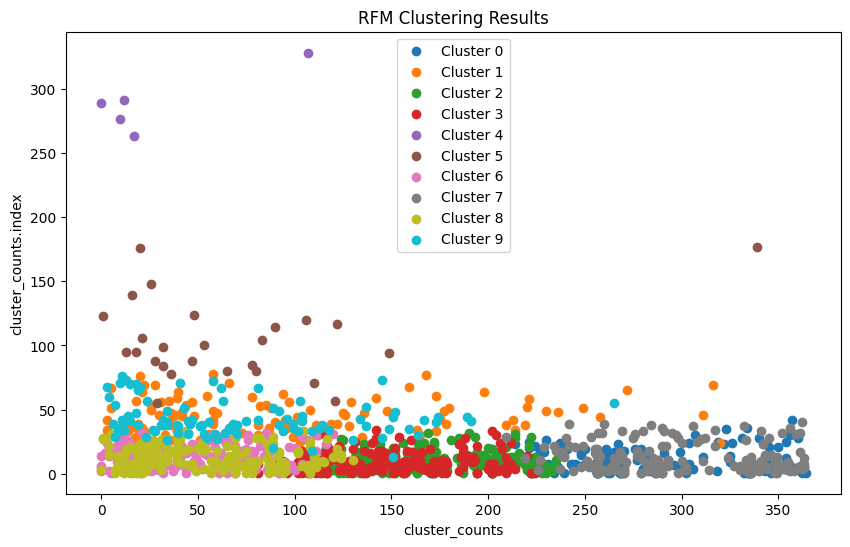

In [58]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 클러스터별로 산점도 그리기
for cluster_label in range(10):
    cluster_data = rfm[rfm['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], label=f'Cluster {cluster_label}')

plt.xlabel('cluster_counts')
plt.ylabel('cluster_counts.index')
plt.title('RFM Clustering Results')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


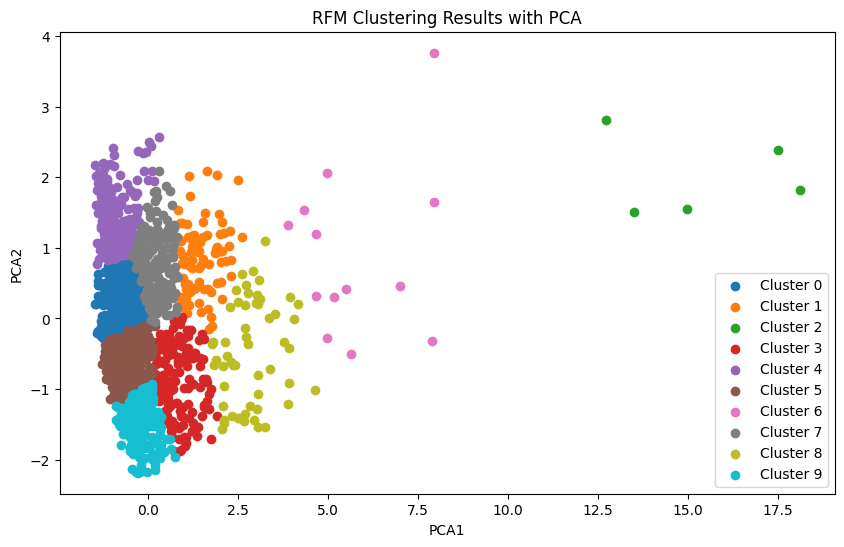

In [59]:
# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
pca_rfm = pca.fit_transform(scaled_rfm)

# k-means 클러스터링
kmeans_pca = KMeans(n_clusters=10, random_state=42)
kmeans_pca.fit(pca_rfm)

# 클러스터 결과 확인
rfm['Cluster_PCA'] = kmeans_pca.labels_

# PCA 주성분 이름 설정
rfm['PCA1'] = pca_rfm[:, 0]
rfm['PCA2'] = pca_rfm[:, 1]

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 클러스터별 산점도 그리기
for cluster_label in range(10):
    cluster_data = rfm[rfm['Cluster_PCA'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('RFM Clustering Results with PCA')
plt.legend()
plt.show()


In [60]:
rfm['Cluster_PCA'].describe()

count    1468.000000
mean        4.286785
std         3.010577
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: Cluster_PCA, dtype: float64

<Axes: >

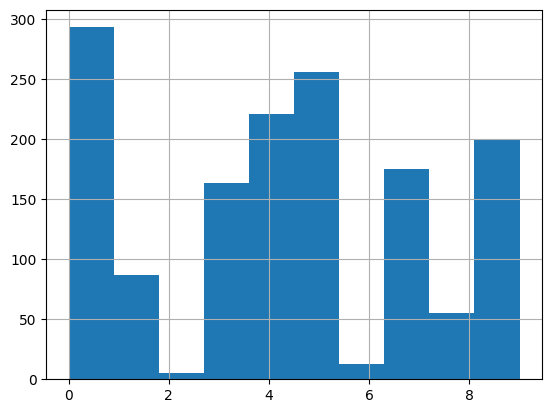

In [61]:
rfm['Cluster_PCA'].hist()

In [62]:
rfm = rfm.rename(columns= {"Unnamed: 0" : '고객ID'})
rfm

,고객ID,Recency,Frequency,Monetary,Cluster,Cluster_PCA,PCA1,PCA2
0,0,107,1,30.99,3,9,-0.750272,-1.793467
1,1,59,31,13834.90,9,8,2.045190,-1.572300
2,2,73,8,1442.12,3,9,-0.276626,-1.897060
3,3,17,11,1360.07,6,9,-0.049991,-2.170839
4,4,107,13,1442.47,3,9,-0.235703,-1.691317
...,...,...,...,...,...,...,...,...
1463,1463,270,3,544.34,7,4,-1.147287,1.944158
1464,1464,87,19,2363.05,8,7,0.040920,1.124337
1465,1465,194,2,101.56,2,4,-1.021813,1.539988
1466,1466,69,1,298.00,8,4,-0.674110,0.894940


In [63]:
cluster_0 = rfm[rfm['Cluster_PCA'] == 0]
cluster_0.describe()

,고객ID,Recency,Frequency,Monetary,Cluster,Cluster_PCA,PCA1,PCA2
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000
mean,807.856655,188.791809,6.993174,1034.231809,2.604096,0.0,-0.717514,0.269624
std,287.941180,92.846875,5.162426,911.973537,2.941248,0.0,0.331693,0.278183
min,130.000000,7.000000,1.000000,1.240000,0.000000,0.0,-1.486447,-0.278533
25%,625.000000,127.000000,3.000000,316.170000,0.000000,0.0,-0.954532,0.042112
50%,819.000000,188.000000,6.000000,827.710000,2.000000,0.0,-0.707732,0.254921
75%,1017.000000,261.000000,9.000000,1491.730000,2.000000,0.0,-0.476561,0.472814
max,1438.000000,364.000000,28.000000,4567.330000,8.000000,0.0,-0.036674,0.876993


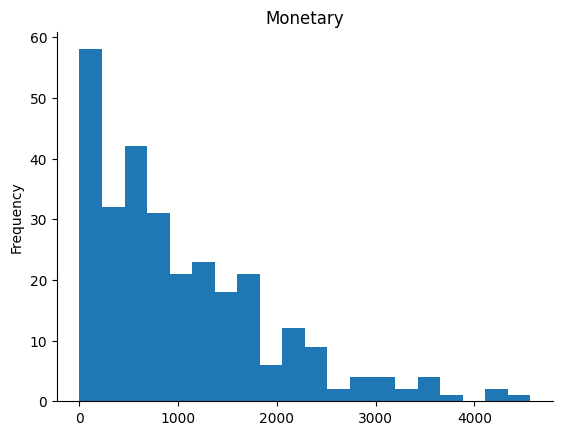

In [64]:
# @title Monetary

from matplotlib import pyplot as plt
cluster_0['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

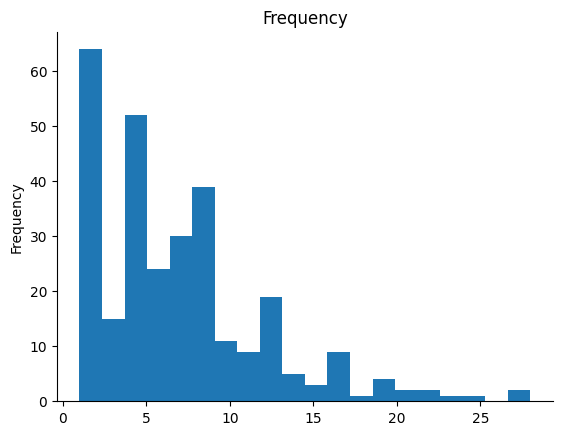

In [65]:
# @title Frequency

from matplotlib import pyplot as plt
cluster_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

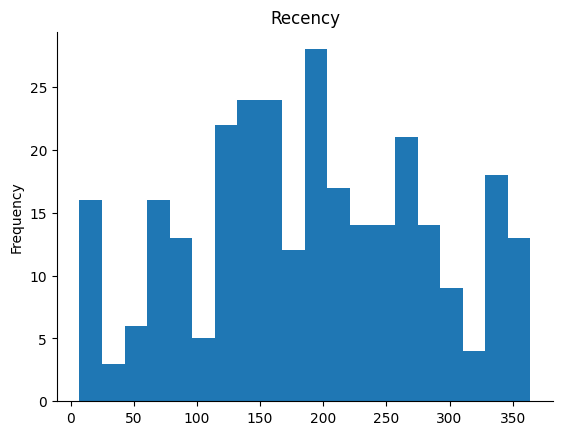

In [66]:
# @title Recency

from matplotlib import pyplot as plt
cluster_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)